### - Plot BIC and Silhouette scores across all clusters for Cell painting & L1000

In [1]:
from collections import defaultdict
import os
import requests
import pickle
import argparse
import pandas as pd
import numpy as np
import re
from os import walk
from collections import Counter
import random
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
##sns.set_palette(["red", "green", "orange","blue","gray","purple"])
sns.set_context("talk")

import pickle
from statistics import median
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
cp_level4_path = '../cell_painting/cellpainting_lvl4_cpd_replicate_datasets'
L1000_level4_path = '../L1000/L1000_lvl4_cpd_replicate_datasets'

In [3]:
df_lvl4_L1 = pd.read_csv(os.path.join(L1000_level4_path, 'L1000_level4_cpd_replicates.csv.gz'), 
                         compression='gzip',low_memory = False)
df_lvl4_cp = pd.read_csv(os.path.join(cp_level4_path, 'cp_level4_cpd_replicates.csv.gz'), 
                         compression='gzip',low_memory = False)

In [4]:
df_lvl4_cp.shape

(51833, 707)

In [5]:
df_silh_L1000 = pd.read_csv(os.path.join(L1000_level4_path, 'L1000_silhouette_scores.csv'))
df_db_L1000 = pd.read_csv(os.path.join(L1000_level4_path, 'L1000_db_scores.csv'))

In [6]:
df_silh_cp = pd.read_csv(os.path.join(cp_level4_path, 'cp_silhouette_scores.csv'))
df_db_cp = pd.read_csv(os.path.join(cp_level4_path, 'cp_db_scores.csv'))

In [7]:
df_cp_bic = pd.read_csv(os.path.join(cp_level4_path, 'cp_bic_scores.csv'))
df_L1_bic = pd.read_csv(os.path.join(L1000_level4_path, 'L1000_bic_scores.csv'))

In [8]:
dose_recode = {1 : '0.04 uM', 2:'0.12 uM', 3:'0.37 uM', 4: '1.11 uM', 5:'3.33 uM', 6:'10 uM'}

In [9]:
df_silh_cp['dose'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
df_silh_cp['profile_tech'] = 'Cell painting'
df_silh_L1000['profile_tech'] = 'L1000'

In [11]:
df_silh_cp['dose'] = df_silh_cp['dose'].map(dose_recode)
df_silh_L1000['dose'] = df_silh_L1000['dose'].map(dose_recode)

In [12]:
df_cp_bic['profile_tech'] = 'Cell painting'
df_L1_bic['profile_tech'] = 'L1000'

In [13]:
df_cp_bic['dose'] = df_cp_bic['dose'].map(dose_recode)
df_L1_bic['dose'] = df_L1_bic['dose'].map(dose_recode)

In [14]:
df_bic = pd.concat([df_cp_bic, df_L1_bic], ignore_index=True)

In [15]:
df_silh = pd.concat([df_silh_cp, df_silh_L1000], ignore_index=True)
df_db = pd.concat([df_db_cp, df_db_L1000], ignore_index=True)

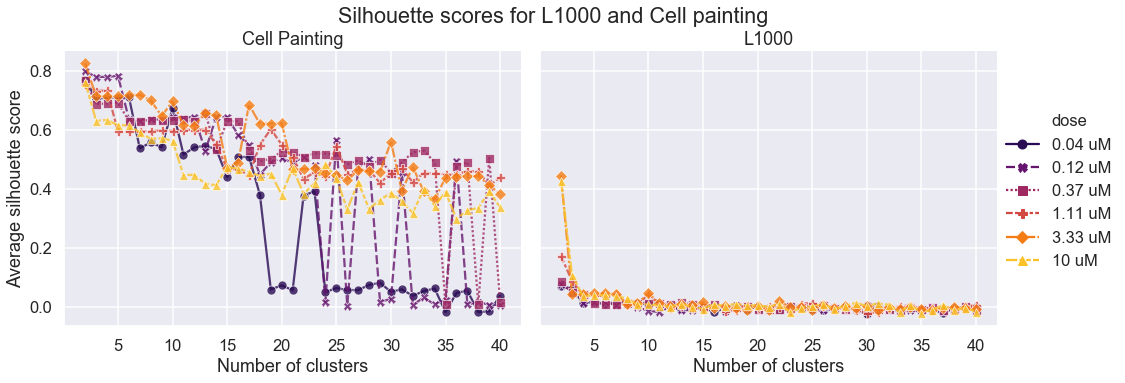

In [16]:
rel_plt = sns.relplot(data=df_silh, x="cluster", y="Average_silhouette_score", col="profile_tech", hue = 'dose', kind="line",
                      palette = 'inferno', style="dose", markers=True,
                      col_wrap=2, height=5.5, aspect=1.3, alpha = 0.8)
rel_plt._legend.set_title('')
rel_plt.set_axis_labels("Number of clusters", "Average silhouette score")
rel_ax = rel_plt.axes.flatten()
rel_ax[0].set_title("Cell Painting")
rel_ax[1].set_title("L1000")
rel_plt.fig.suptitle('Silhouette scores for L1000 and Cell painting')
rel_plt.fig.subplots_adjust(top=.87)

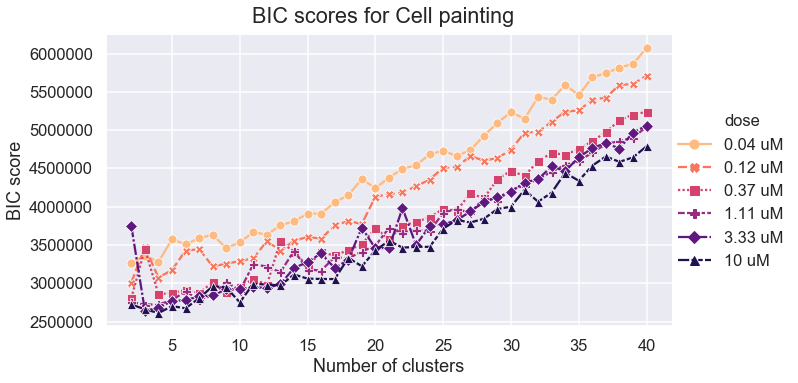

In [17]:
rel_plt = sns.relplot(data=df_cp_bic, x="cluster", y="BIC_score", hue = 'dose', kind="line",
            markers=True, style="dose", palette = "magma_r", height=5.5, aspect=1.8)
rel_plt._legend.set_title('')
rel_plt.set_axis_labels("Number of clusters", "BIC score")
rel_plt.fig.suptitle('BIC scores for Cell painting')
rel_plt.fig.subplots_adjust(top=.91)

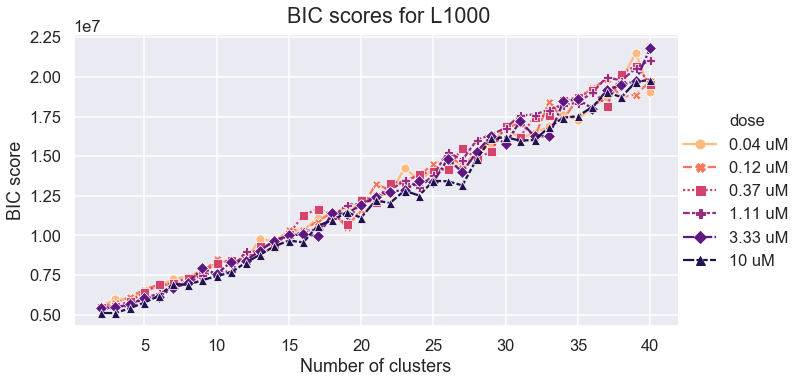

In [18]:
rel_plt = sns.relplot(data=df_L1_bic, x="cluster", y="BIC_score", hue = 'dose', kind="line",
            markers=True, style="dose", palette = "magma_r", height=5.5, aspect=1.8)
rel_plt._legend.set_title('')
rel_plt.set_axis_labels("Number of clusters", "BIC score")
rel_plt.fig.suptitle('BIC scores for L1000')
rel_plt.fig.subplots_adjust(top=.91)